# Pandas Practice 3 (Bike Share Data)

As a data scientist, you don't always have to invent the wheel from scratch. The great advantage of Python is that smart people before you spend a lot of energy on making life easier for the next programers. So please, make your life easier and use code that has already been implemented, don't call it "copying" but "friendly borrowing" of other people's code. If you copy whole functions or great graphs in the future, don't forget to give props to the inventor!

So for this exercise, too, if you get stuck at any point, look at good solutions from others and learn a lot from them about how to solve these problems even better.
Here are two good resources for small code snippet which can be very helpful when dealing with DataFrames:

- [Sebastian Raschkas "Things in Pandas I Wish I'd Known Earlier"](https://nbviewer.jupyter.org/github/rasbt/python_reference/blob/master/tutorials/things_in_pandas.ipynb)
- [Helpful Python Code Snippets for Data Exploration in Pandas](https://medium.com/@msalmon00/helpful-python-code-snippets-for-data-exploration-in-pandas-b7c5aed5ecb9)
- [Manipulating tabular data with Pandas](https://neuroimaging-data-science.org/content/004-scipy/002-pandas.html)


**By the end of this session you should be able to**
- Explore data with Pandas to answer conceptual questions
- Write chained commands for efficient one-liners



In [51]:
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
df = pd.read_csv('data/bike_share_201402_trip_data.csv')
df.head()

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscription Type,Zip Code
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103


How many observations are there?

In [53]:
df.shape

(144015, 11)

Change the columns to be pythonic:

- lowercase 
- replace " " with `_` as a separator
- replace "#" with `num` 


In [56]:
df_col = df.columns.to_list()
rep_list = [" ", "#"]
df_col_adapt = []
for i in range(0,len(df_col)):
    df_col_adapt.append(df_col[i].lower())
    for j in rep_list:
        if j==" ":
            df_col_adapt[i] = df_col_adapt[i].replace(j, "_")
        elif j=="#":
            df_col_adapt[i] = df_col_adapt[i].replace(j, "1")

#df_col_adapt = [elem.lower().replace(i,"_") for elem in df_col]
df_col_adapt
df.columns = df_col_adapt
df.head()

,trip_id,duration,start_date,start_station,start_terminal,end_date,end_station,end_terminal,bike_1,subscription_type,zip_code
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103


How many types of subscription options are there? What are the different subscription types?

In [70]:
subs_types = df.groupby('subscription_type').size().index.to_list()
print(subs_types)

['Customer', 'Subscriber']


What is the frequency of each subscription option?

In [72]:
subs_freq = df.groupby('subscription_type').size().to_list()
print(subs_freq)

[30368, 113647]


Please plot the frequency of each subscription option with a pie chart:

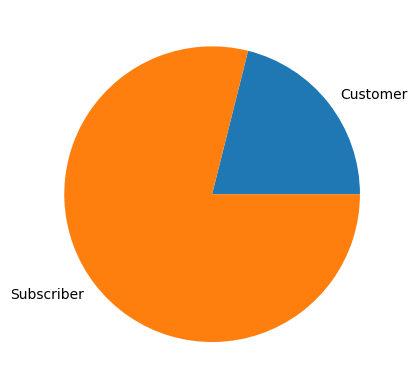

In [76]:
plt.pie(subs_freq, labels=subs_types)
plt.show()

Please plot the frequency of each subscription option with a bar chart:

<BarContainer object of 2 artists>

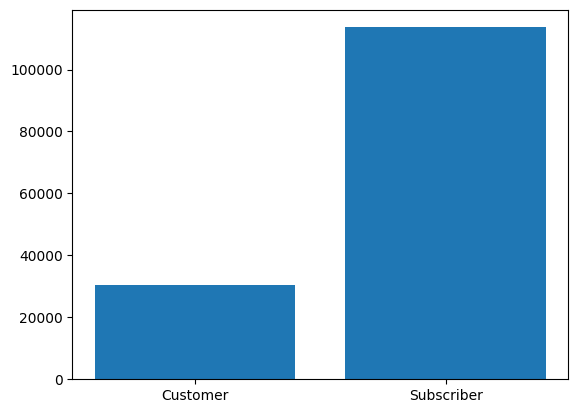

In [78]:
plt.bar(subs_types, subs_freq)

Have a look at the start_station column: Which 10 stations occur most frequently?

In [82]:
df.groupby('start_station')

Now look at the end_station column: Which 10 stations occur the least often?

Create a table that has start_station segmented by subscription_type and include also the row/column margins (subtotals). If you are not sure how to do it, check out the documentation for `pd.crosstab()`.

Let's look at the duration... Which unit do you think is used here?

How long is the shortest trip? How many are that short?

What do you think is going on with the short trips?

What is the longest trip?

How would you define a "long" trip? How many trips are "long" according to your definition?

Do the long durations seem reasonable? Why are they so long? What could it tell us about the users?

Plot the duration column.

Does this plot give any insights?

Select subsections of the data to make plots that provide more insights.

The Product Team would like all of the station names to be lower case and  with `_` as a separator

`South Van Ness at Market` -> `south_van_ness_at_market`  

**DO NOT USE A FOR LOOP. THEY ARE THE 👿**

Now take a timer and set it to 15 minutes. Take this time to explore the data guided by your own intuition or hypotheses…
> Time boxing is a helpful approach when working with a new dataset so you won't fall into any rabbit holes. 